In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../datasets/machine_learning_a-z/P14-K-Nearest-Neighbors/K_Nearest_Neighbors/Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
print(y_test == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False False  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[62,  6],
       [ 3, 29]])

In [16]:
from matplotlib.colors import ListedColormap

In [17]:
X_set, y_set = X_train, y_train

In [18]:

X1, X2 = np.meshgrid(
np.arange(start = X_set[:,0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
np.arange(start = X_set[:,1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01)
)

/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'figsize'
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


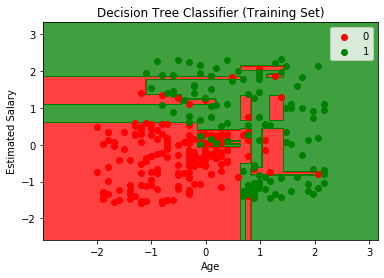

In [19]:
plt.contourf(X1 ,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')),
            figsize=(20,20))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j , 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'figsize'
  # This is added back by InteractiveShellApp.init_path()
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


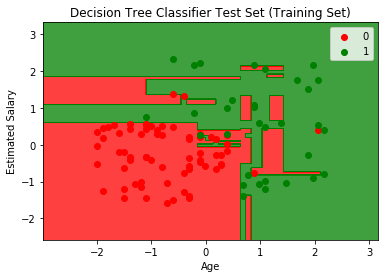

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
np.arange(start = X_set[:,0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
np.arange(start = X_set[:,1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01)
)

plt.contourf(X1 ,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')),
            figsize=(20,20))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j , 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree Classifier Test Set (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()